In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [303]:
# data

train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

In [20]:
%%script false --no-raise-error
profile_train = ProfileReport(train, title='Pandas Profiling Report', explorative=True)

In [21]:
# %%script false --no-raise-error
# profile_train.to_notebook_iframe()

In [22]:
train.describe()

,id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,revenue
count,8631.00000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,4316.00000,2.302398,80.509877,0.508748,34.314914,31.697718,1195.706056,0.021485,0.042400,5.931044,0.059761,2.116672,2.357201,3.149345,4.073224,0.154443
std,2491.69942,3.291140,173.090680,1.280891,135.652626,44.379155,1828.486623,0.047272,0.047634,18.839500,0.196143,0.902649,1.717329,2.408908,4.023450,0.361394
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2158.50000,0.000000,0.000000,0.000000,0.000000,7.000000,186.475000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,4316.00000,1.000000,7.625000,0.000000,0.000000,18.000000,602.883333,0.003030,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,6473.50000,4.000000,91.950000,0.000000,0.000000,37.000000,1477.564759,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,8631.00000,27.000000,2720.500000,24.000000,2195.300000,705.000000,43171.233380,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [23]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8631 non-null   int64  
 1   Administrative           8631 non-null   int64  
 2   Administrative_Duration  8631 non-null   float64
 3   Informational            8631 non-null   int64  
 4   Informational_Duration   8631 non-null   float64
 5   ProductRelated           8631 non-null   int64  
 6   ProductRelated_Duration  8631 non-null   float64
 7   BounceRates              8631 non-null   float64
 8   ExitRates                8631 non-null   float64
 9   PageValues               8631 non-null   float64
 10  SpecialDay               8631 non-null   float64
 11  Month                    8631 non-null   object 
 12  OperatingSystems         8631 non-null   int64  
 13  Browser                  8631 non-null   int64  
 14  Region                  

## EDA

### Revenue
revenue: Variable a clasificar, 1 indica que el visitante compró y 0 indica que el visitante no compro.
- Está desbalanceada para 0



<AxesSubplot:>

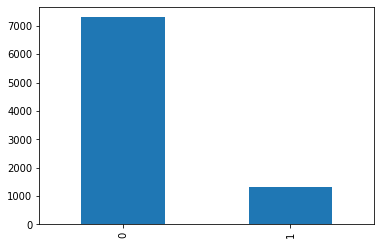

In [24]:
train.revenue.value_counts().plot.bar()

In [28]:
print(train.revenue.value_counts(), "\n", train.revenue.value_counts(normalize=True))

0    7298
1    1333
Name: revenue, dtype: int64 
 0    0.845557
1    0.154443
Name: revenue, dtype: float64


### administrative & administrative_duration 
- administrative: Número de veces que el usuario visitó la sección administrativa
- administrative_duration: Tiempo total que el usuario duro en la sección administrativa


<AxesSubplot:xlabel='Administrative', ylabel='Density'>

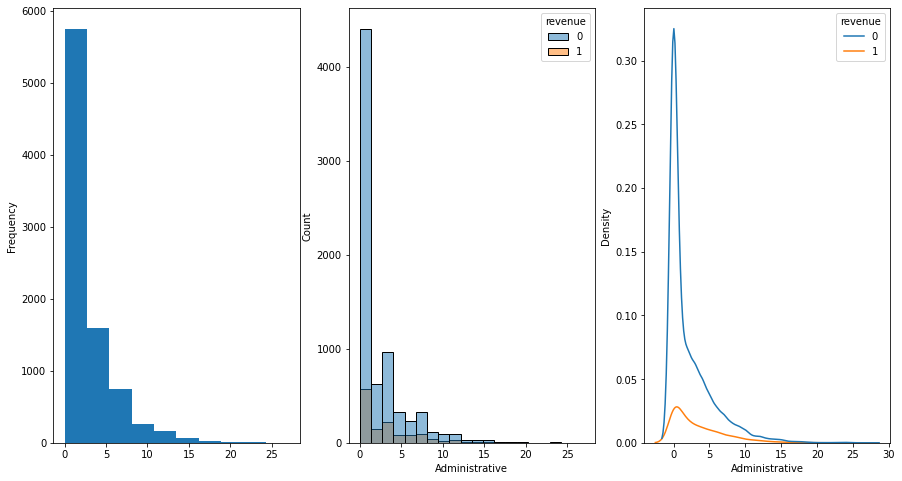

In [119]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
train.Administrative.plot.hist(ax=ax[0])
sns.histplot(train, x="Administrative", bins=20, ax=ax[1], hue='revenue')
sns.kdeplot(data=train, x="Administrative", hue="revenue", ax=ax[2])

<AxesSubplot:xlabel='Administrative_Duration', ylabel='Density'>

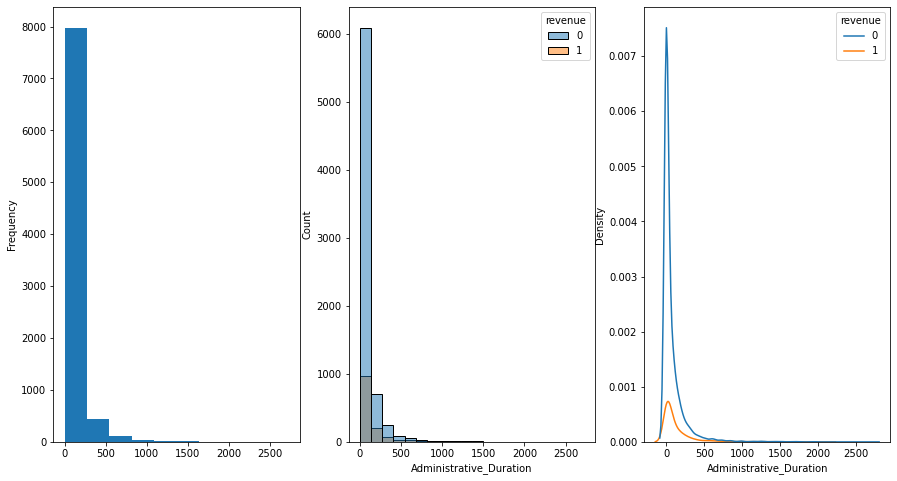

In [120]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
train.Administrative_Duration.plot.hist(ax=ax[0])
sns.histplot(train, x="Administrative_Duration", bins=20, ax=ax[1], hue='revenue')
sns.kdeplot(data=train, x="Administrative_Duration", hue="revenue", ax=ax[2])

### Informational & Informational_Duration
- informational: Número de veces que el usuario visitó la sección informativa
- informational_duration: Tiempo total que el usuario duro en la sección informativa


<AxesSubplot:ylabel='Frequency'>

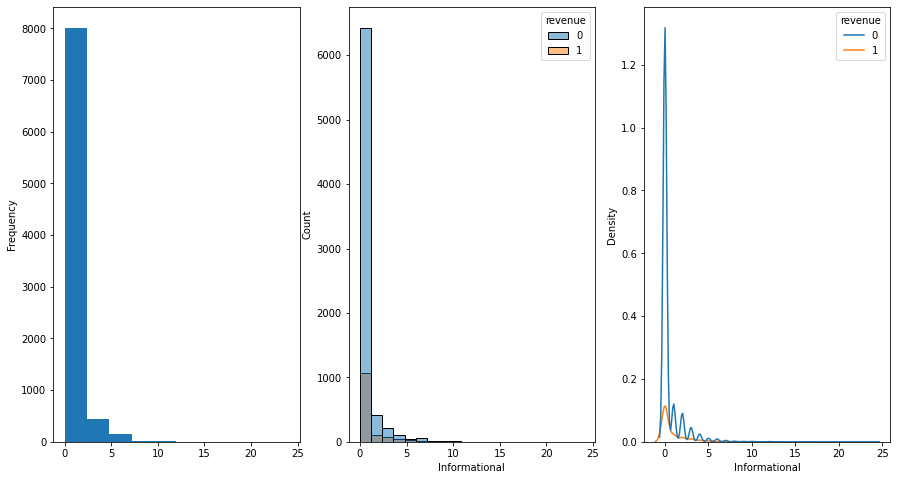

In [93]:
fig, ax = plt.subplots(1,3, figsize=(15,8))

train.Informational.plot.hist(ax=ax[0])
sns.histplot(train, x="Informational", bins=20, ax=ax[1], hue='revenue')
sns.kdeplot(data=train, x="Informational", hue="revenue", ax=ax[2])

<AxesSubplot:xlabel='Informational_Duration', ylabel='Density'>

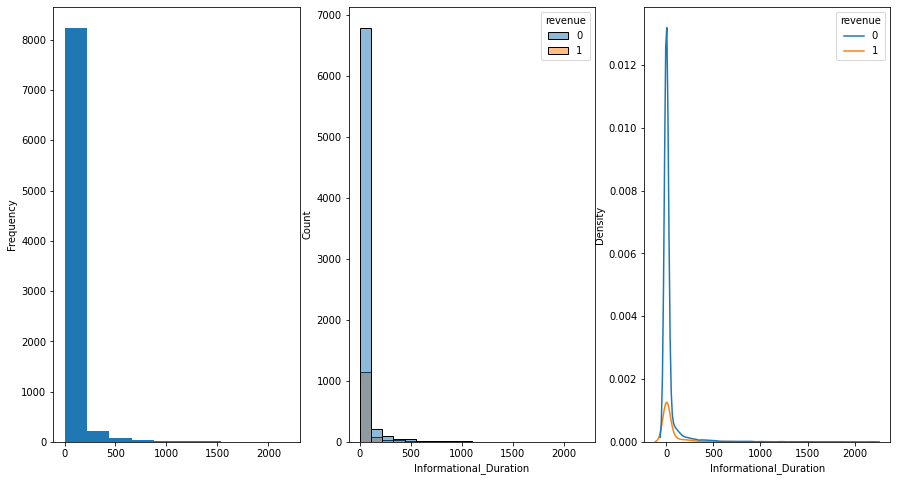

In [124]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
train.Informational_Duration.plot.hist(ax=ax[0])
sns.histplot(train, x="Informational_Duration", bins=20, ax=ax[1], hue='revenue')
sns.kdeplot(data=train, x="Informational_Duration", hue="revenue", ax=ax[2])
# train.Informational_Duration.plot.box()#(by=["revenue"])


### ProductRelated & ProductRelated_Duration
- sproductrelated: Número de veces que el usuario visitó la sección de productos relacionados
- productrelated_duration: Tiempo total que el usuario duro en la sección de productos relacionados

<AxesSubplot:>

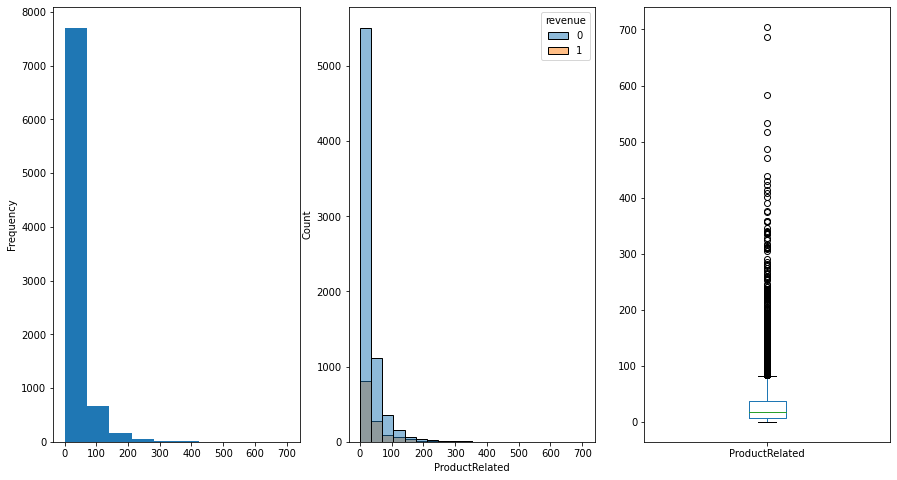

In [113]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
train.ProductRelated.plot.hist(ax=ax[0])
sns.histplot(train, x="ProductRelated", bins=20, ax=ax[1], hue='revenue')
# sns.kdeplot(data=train, x="ProductRelated", hue="revenue", ax=ax[2])
train.ProductRelated.plot.box(by=["revenue"])

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Density'>

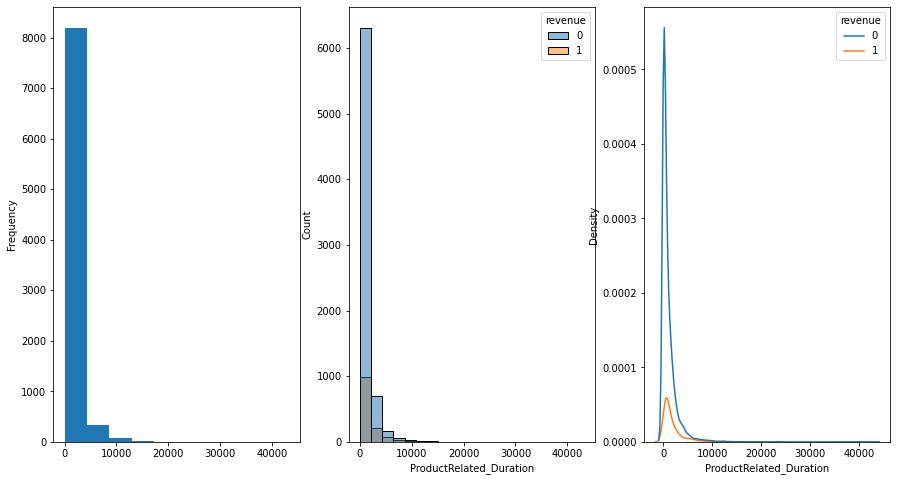

In [126]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
train.ProductRelated_Duration.plot.hist(ax=ax[0])
sns.histplot(train, x="ProductRelated_Duration", bins=20, ax=ax[1], hue='revenue')
sns.kdeplot(data=train, x="ProductRelated_Duration", hue="revenue", ax=ax[2])

### BounceRates
- bouncerates:  Es el porcentaje de visitantes que ingresan a la página y “rebotan” inmediatamente sin interactuar con ella. 

Solo se tiene en cuenta esta métrica, si es la primera página que visitan dentro del sitio web.
    

<AxesSubplot:xlabel='BounceRates', ylabel='BounceRates'>

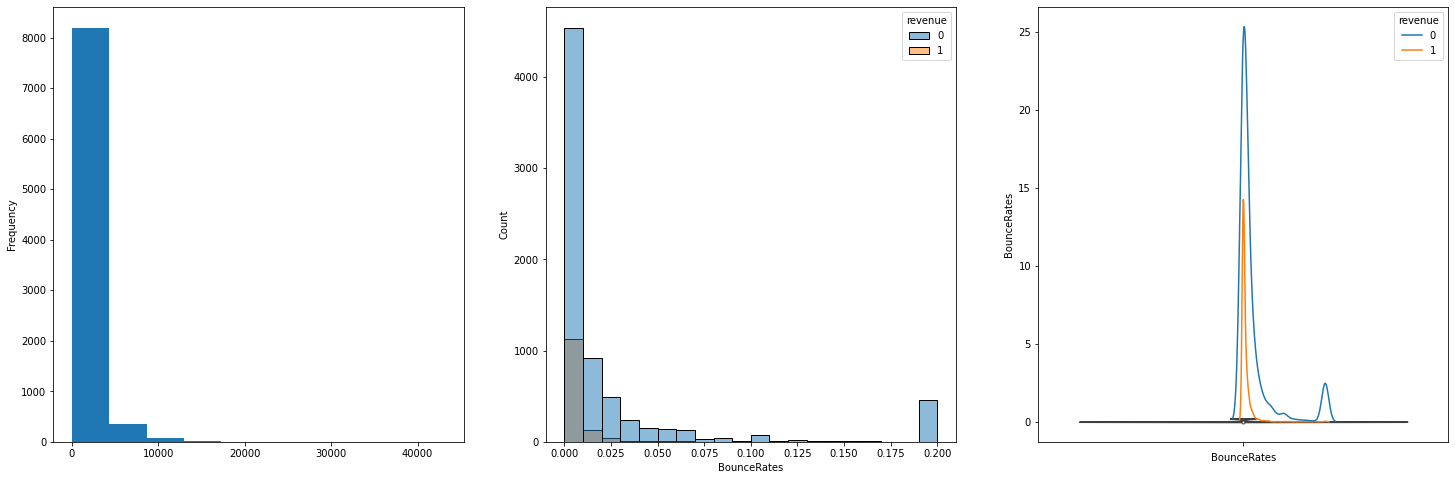

In [130]:
fig, ax = plt.subplots(1,3, figsize=(25,8))
train.ProductRelated_Duration.plot.hist(ax=ax[0])
sns.histplot(train, x="BounceRates", bins=20, ax=ax[1], hue='revenue')
sns.kdeplot(data=train, x="BounceRates", hue="revenue", ax=ax[2])
# sns.violinplot(data=train, x='BounceRates', hue="revenue", ax=ax[2], split=True)

sns.violinplot(data=train, y='BounceRates', hue="revenue", ax=ax[2], split=True)

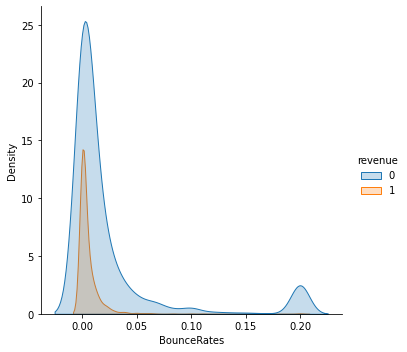

In [68]:
sns.displot(train, x="BounceRates", hue="revenue", kind="kde", fill=True)

### ExitRates
- exitrates: Del número total de visitas a las páginas del sitio web, se obtiene el porcentaje de visitas que cerró sesión a través de esta página específica, es decir, indica el porcentaje de usuarios cuya última visita al sitio web fue esta página específica.

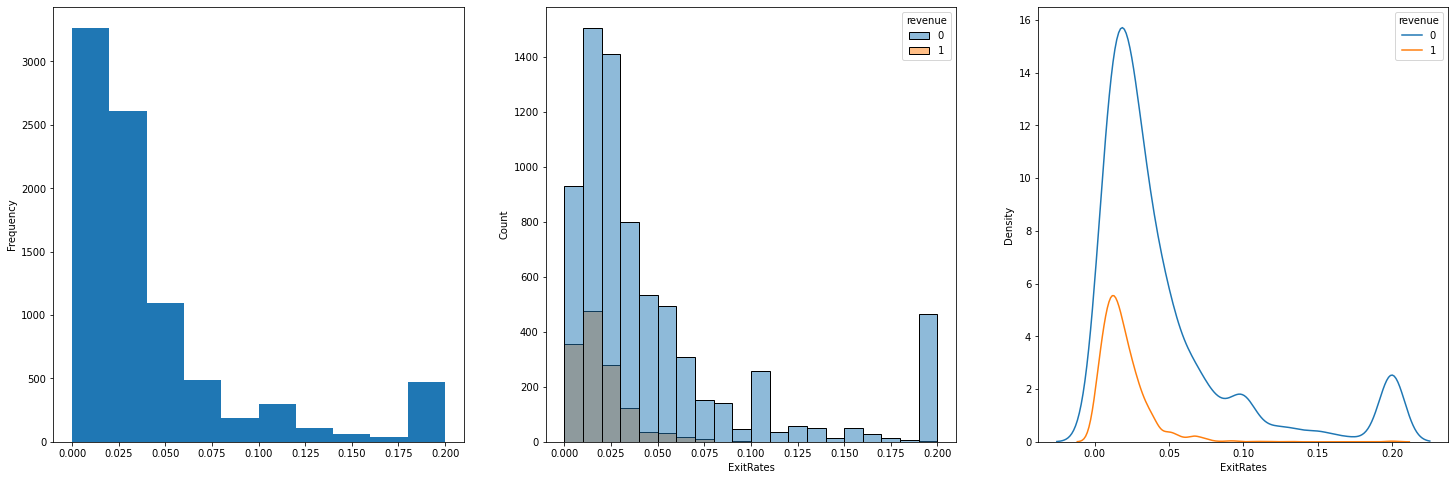

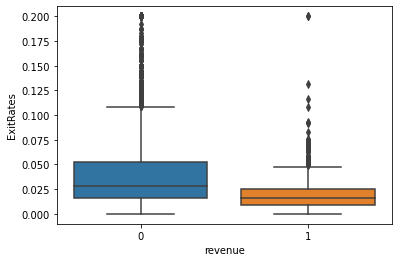

In [304]:
fig, ax = plt.subplots(1,3, figsize=(25,8))
train.ExitRates.plot.hist(ax=ax[0])
sns.histplot(train, x="ExitRates", bins=20, ax=ax[1], hue='revenue')
sns.kdeplot(data=train, x="ExitRates", hue="revenue", ax=ax[2])
# sns.violinplot(data=train, x='ExitRates', hue="revenue", ax=ax[2], split=True)
plt.show()

sns.violinplot(data=train, y='ExitRates', hue="revenue", ax=ax[2], split=True)

plt.show()

# train["revenue"] = train['revenue'] == 1
sns.boxplot(x="revenue", y="ExitRates", data=train)

plt.show()


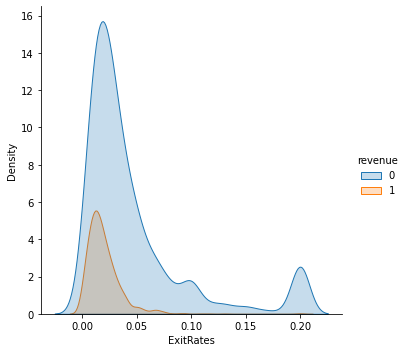

In [65]:
sns.displot(train, x="ExitRates", hue="revenue", kind="kde", fill=True)

### PageValues
pagevalues: Es el valor promedio de la página web, indica la contribución que realizó dicha página web para que el visitante llegara a la página o sección final de compra. 

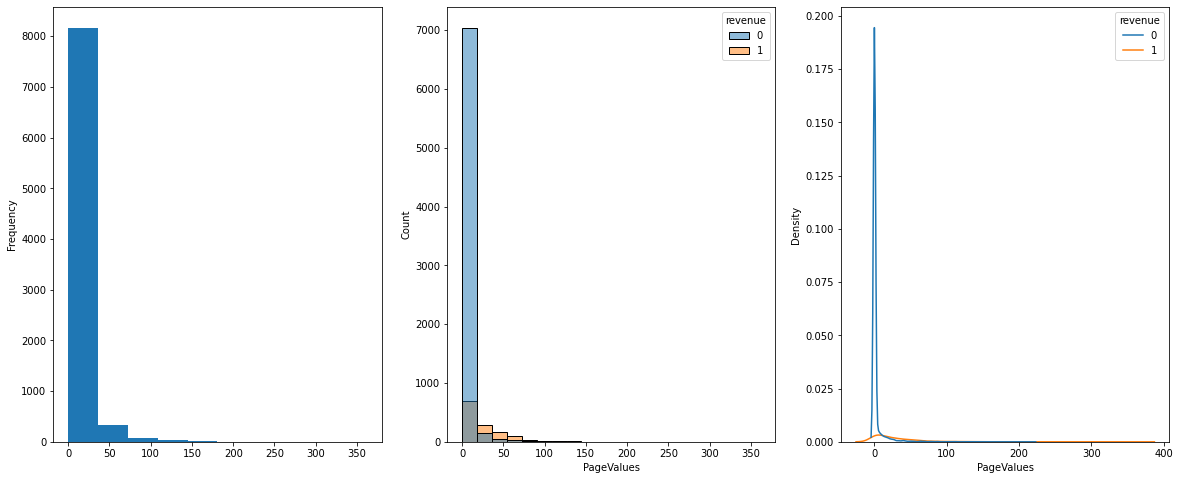

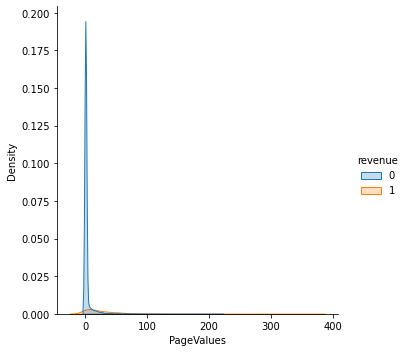

<AxesSubplot:xlabel='PageValues'>

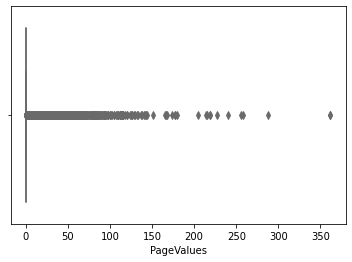

In [289]:
fig, ax = plt.subplots(1,3, figsize=(20,8))
train.PageValues.plot.hist(ax=ax[0])
sns.histplot(train, x="PageValues", bins=20, ax=ax[1], hue='revenue')
sns.kdeplot(data=train, x="PageValues", hue="revenue", ax=ax[2])

plt.show()
sns.displot(train, x="PageValues", hue="revenue", kind="kde", fill=True)
plt.show()
sns.boxplot(x="PageValues", hue="revenue", data=train)

### SpecialDay

specialday: Es el valor que indica la cercanía a una fecha especial como lo es por ejemplo el día de San Valentín.  El rango de esta variable es de 0 a 1, siendo 1 el día exacto de la fecha especial y 0 si no hay un rango cercano a dicha fecha.

SpecialDay

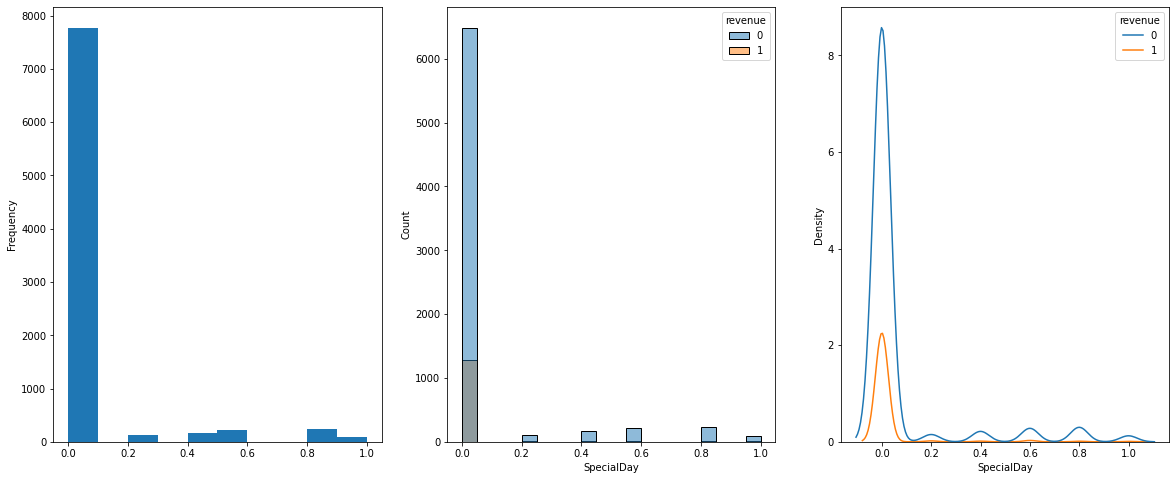

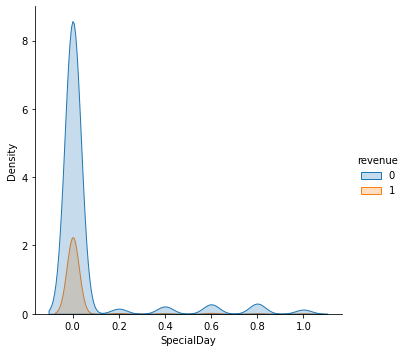

<AxesSubplot:>

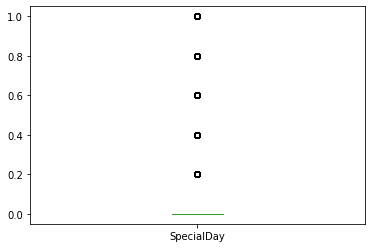

In [285]:
fig, ax = plt.subplots(1,3, figsize=(20,8))
train.SpecialDay.plot.hist(ax=ax[0])
sns.histplot(train, x="SpecialDay", bins=20, ax=ax[1], hue='revenue')
sns.kdeplot(data=train, x="SpecialDay", hue="revenue", ax=ax[2])

plt.show()
sns.displot(train, x="SpecialDay", hue="revenue", kind="kde", fill=True)
plt.show()

train.SpecialDay.plot.box()

### Month
- month: Mes de la visita al sitio web.

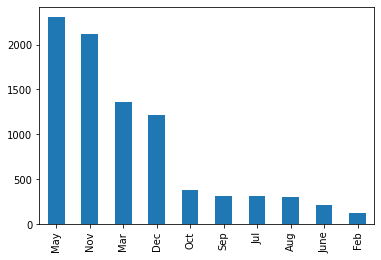

In [286]:
# fig, ax = plt.subplots(1,3, figsize=(20,8))
train.Month.value_counts().plot.bar()
plt.show()
# train.Month.plot.hist(ax=ax[0])
# sns.histplot(train, x="Month", bins=20, ax=ax[1], hue='revenue')
# sns.kdeplot(data=train, x="Month", hue="revenue", ax=ax[2])

# plt.show()
# sns.displot(train, x="Month", hue="revenue", kind="kde", fill=True)
# plt.show()


### OperatingSystems
- operatingsystems: Tipo de sistema operativo


<AxesSubplot:>

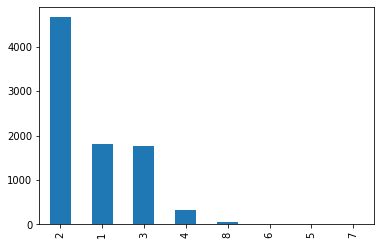

In [277]:
train.OperatingSystems.value_counts().plot.bar()

### Browser
- browser: Nombre del explorador web

<AxesSubplot:>

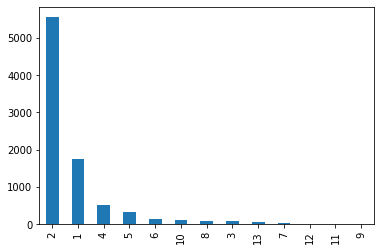

In [278]:
train.Browser.value_counts().plot.bar()

### Region
region: Región geográfica del visitante

<AxesSubplot:>

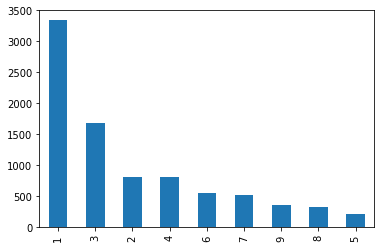

In [279]:
train.Region.value_counts().plot.bar()

### TrafficType
traffictype: Tipo de tráfico web

TrafficType

<AxesSubplot:>

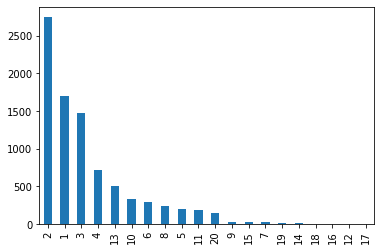

In [280]:
train.TrafficType.value_counts().plot.bar()

### VisitorType
visitortype: Si es un visitante nuevo o un visitante que regresa

VisitorType

<AxesSubplot:>

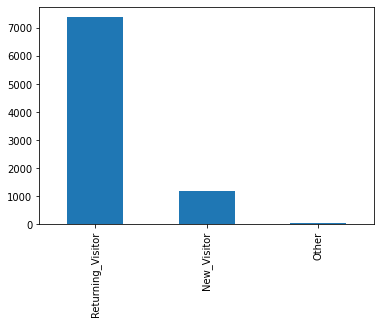

In [287]:
train.VisitorType.value_counts().plot.bar()

    
### Weekend
weekend: 0 indica que no es un día del fin de semana y 1 indica que si es un día del fin de semana.

Weekend

<AxesSubplot:>

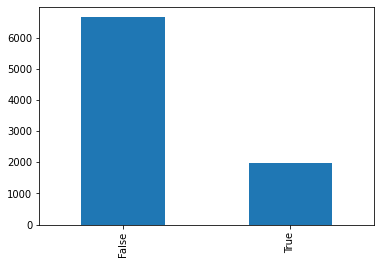

In [288]:
train.Weekend.value_counts().plot.bar()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


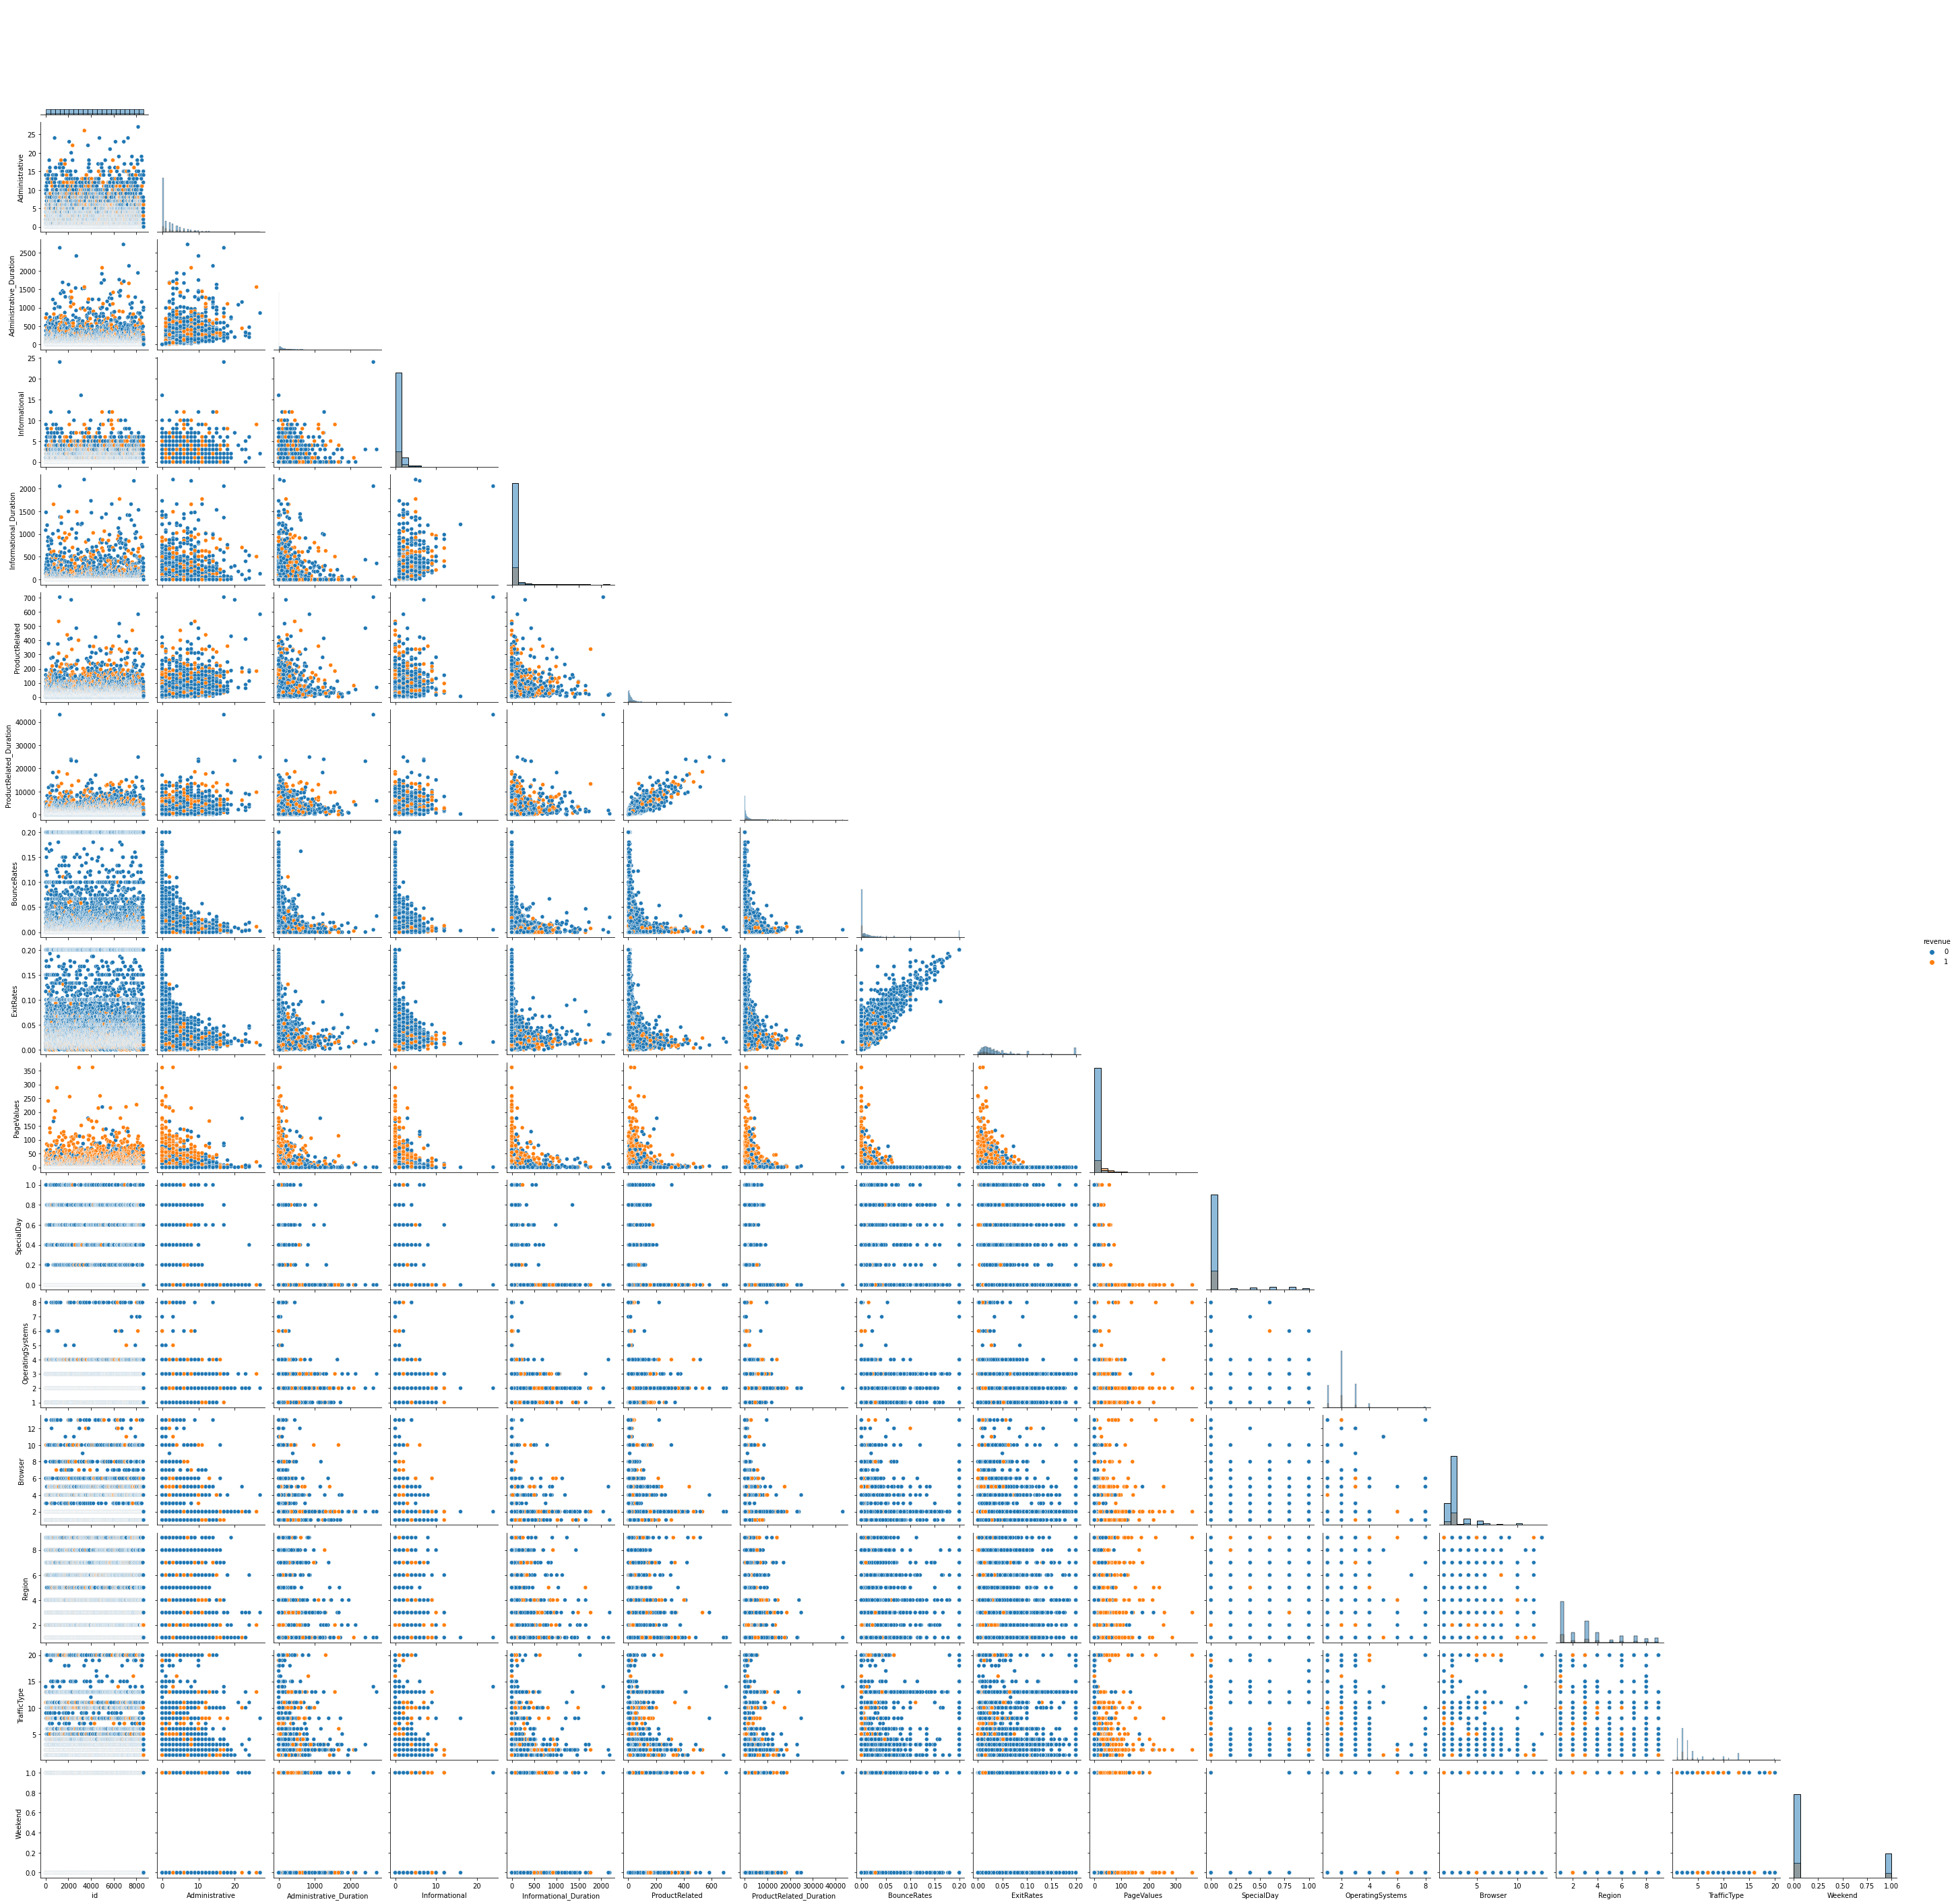

In [158]:
sns.pairplot(train, hue="revenue", diag_kind="hist", corner=True)

_________________________